In [1]:
from IPython.display import display, Markdown, Latex

In [2]:
with open('../README.md', 'r') as readme:
    for line in readme:
        display(Markdown (line))

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/damian-romero/covid19_mx/924d8de24975961391a27980c373c3ddf710e872?filepath=https%3A%2F%2Fgithub.com%2Fdamian-romero%2Fcovid19_mx%2Fblob%2Fmaster%2Fcovid%2Fcovid19mx_notebook.ipynb)


### COVID-19 México


#### [covid19_mx](https://github.com/damian-romero/covid19_mx)


#### ©Damian Romero


#### Abril de 2020


##### Descripción:


*Un repositorio muy sencillo para explorar los datos de infección por covid-19 (el nuevo coronavirus) de acuerdo con el (ECDC) Centro Europeo para la Prevención y el Control de las Enfermedades [https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide].*


*El objetivo principal de este repositorio es proveer una manera sencilla para que la población en general compare los datos del coronavirus por sí mismos. Espero contribuir a que todos entendamos un poco mejor la situación a la que nos enfrentamos.*


**Nota importante**


*Los datos aquí utilizados provienen del ECDC y su uso es exclusivo para análisis estadísticos y reportes. Todo uso distinto queda prohibido. Acontinuación cito el aviso en [su página de internet]([https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide]):*


"The downloadable data file is updated daily and contains the latest available public data on COVID-19. Public-use data files allows users to manipulate the data in a format appropriate for their analyses. Users of ECDC public-use data files must comply with data use restrictions to ensure that the information will be used solely for statistical analysis or reporting purposes."


**The copyright for the data can be found here: [https://www.ecdc.europa.eu/en/copyright]**


- Este repositorio está distribuido con una licencia abierta typo MIT.


- Escrito para Python 3.7+


- El repositorio utiliza JupyterNotebooks y [mybinder](https://mybinder.org/) para integrar interactividad.


- Incluye comparaciones entre México y otros países a través del tiempo.


- Incluye el uso de porcentajes de población infectada.


- Para colaborar, usa la opción de "fork" en GitHub y haz un "pull request".


- Agradecería en especial comparaciones con datos de influenza(s).


*Hago una nueva actualización manual de los datos cada semana o antes, dependiendo de mi disponibilidad. Si requieres datos actuales te recomiendo ir directamente a la página del ECDC y bajar la versión CSV e integrarla a tu análisis.


#### DEVS


- Please look at the ToDo.md file to see what remains to be done


In [3]:
import datos.encabezado

# Exploración de datos de COVID19
  ## Actualizado el: 24-04-2020
  

### Fecha de hoy: 24-04-2020
  

_Los datos fueron actualizados el día de hoy_

#### Este archivo te permitirá explorar los datos del contagio de COVID19 [https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide]

# 1. Cargar los datos

## 1.1. Importar el módulo ```pandas```

*Cargar o "importar" los datos en Python usando un paquete para el manejo de datos llamado "Pandas".*

In [4]:
from pandas import read_csv

## 1.2. Abrir la tabla de datos
Abriremos la tabla de datos usando el paquete "Pandas" que acabamos de importar
* Usaremos los datos en versión ".csv".
- Si quieren la versión más reciente de los datos:
    1. Los deben bajar directamente de esta página: http://opendata.ecdc.europa.eu/covid19/casedistribution/csv/
    2. Deben de nombrar el archivo como "covid19.csv"
    3. También tendrán que bajar este proyecto a su computadora y hacerlo correr.  
        **\*Siempre me lleva unos días actualizarlo porque este es solo un proyecto por diversión.**

### *1.2.1. La siguiente es la fecha de los datos que actualicé más recientemente:*

In [5]:
# Extraemos la información del sub-módulo datos, del archivo encabezado
from datos.encabezado import fecha_actualizacion
fecha_actualizacion

'24-04-2020'

### *1.2.2. Y el siguiente archivo es la tabla de datos correspondiente:*

In [6]:
from datos.encabezado import tabla_de_datos
tabla_de_datos

'covid19_24-04-2020_.csv'

### *1.2.3. Abrimos los datos de todo el mundo y después nos enfocaremos en los datos de México.*

In [7]:
folder_datos = 'datos/'

datos_mundo = read_csv(folder_datos + tabla_de_datos)
if not datos_mundo.empty:
    display(Markdown(f"""_Tus datos del archivo `{tabla_de_datos}` están cargados_"""))

_Tus datos del archivo `covid19_24-04-2020_.csv` están cargados_

# 2. Familiarizarnos con los datos
*Los datos vienen en una tabla con varias columnas y filas. Cada columna tiene un nombre distinto, por ejemplo hay una para los nombres de los países, otra para la población del país, etc. Y las filas representan un día de la pandemia en cada país.*

## 2.1. Antes de empezar

*Antes de empezar, elige un número en la siguiente línea en donde dice ```mostrar_los_primeros = 5```. Si substituyes el número 5 por el de tu elección y luego presionas el botón de* **`Run`** *en el menú de arriba, la tabla te mostrará las primeras X filas de tus datos (te recomiendo no elegir más de 20 para que no sea imposible leer este documento).*

In [8]:
mostrar_los_primeros_n = 5

### *2.1.1. Veamos cómo se ve la tabla, para darnos una mejor idea de los datos*

*La siguiente línea nos mostrará las primeras y últimas filas de la tabla*

In [9]:
datos_mundo.head(mostrar_los_primeros_n)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,24/04/2020,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
1,23/04/2020,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
2,22/04/2020,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
3,21/04/2020,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia
4,20/04/2020,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia


### *2.1.1. Veamos con atención los nombres de las columnas*

In [10]:
explicación_esp = ['fecha completa','día del mes en la siguiente columna','mes','año','número de casos','númer de muertes','número del país o territorio', 'continente','código del país o territorio','población en 2018'	,'países y territorios',]

for numero_columna, columna in enumerate(list(datos_mundo)): 
    print(f"""Columna # {numero_columna + 1} -> {columna} -> ({explicación_esp[numero_columna]})""")
#     print(f"""Columna # {numero_columna + 1} -> {columna}""")

Columna # 1 -> dateRep -> (fecha completa)
Columna # 2 -> day -> (día del mes en la siguiente columna)
Columna # 3 -> month -> (mes)
Columna # 4 -> year -> (año)
Columna # 5 -> cases -> (número de casos)
Columna # 6 -> deaths -> (númer de muertes)
Columna # 7 -> countriesAndTerritories -> (número del país o territorio)
Columna # 8 -> geoId -> (continente)
Columna # 9 -> countryterritoryCode -> (código del país o territorio)
Columna # 10 -> popData2018 -> (población en 2018)
Columna # 11 -> continentExp -> (países y territorios)


### *2.1.3. Exploremos el número total de filas que tiene la tabla de datos.*

* *Recordemos que esto representa la suma del número de días por cada país representado. Algunas columnas están vacías porque el ECDC no tiene ciertos datos (por ejemplo, la población de algunos países no está en la tabla), así que habrá algunas discrepancias en los números de ciertas columnas.*

In [11]:
datos_mundo.count() # la operación .count() hace un conteo por columna

dateRep                    12801
day                        12801
month                      12801
year                       12801
cases                      12801
deaths                     12801
countriesAndTerritories    12801
geoId                      12760
countryterritoryCode       12664
popData2018                12694
continentExp               12801
dtype: int64

## 2.2. Explorar datos de infecciones y muertes

### *2.2.1. Veamos primero los datos de la actualización más reciente*

#### 2.2.1.1. Primero vamos a tomar los datos de la fecha de esta versión de los datos.

>**\*Nota que puedes jugar con el día siempre y cuando este esté incluído en la tabla**

*Cambia la fecha en ```datos.encabezado.fecha_actualizacion``` en la siguiente línea si quieres ver diferentes días.* ***Usa el formato 'día/mes/año' con comillas y exactamente de esta manera, de lo contrario, el programa te dirá que hay un error: ```'01/04/2020'```***

In [12]:
# Cambia la siguiente línea si quieres revisar otro día.
# Puedes cambiarla a algo parecido a:
# dia_que_nos_interesa = '01/04/2020'
dia_que_nos_interesa = fecha_actualizacion

#### 2.2.1.2. Nos aseguramos de que la fecha contenga '/' y no '-'

In [13]:
dia_que_nos_interesa = dia_que_nos_interesa.replace('-','/') 

#### 2.2.1.3. *Creamos una nueva tabla pero ahora elegimos solamente los datos del día que nos interesa*

In [14]:
# Crear tabla
datos_dia_elegido = datos_mundo[datos_mundo.dateRep == dia_que_nos_interesa]
# Mostrar las primeros n filas
datos_dia_elegido.head(mostrar_los_primeros_n)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,24/04/2020,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
106,24/04/2020,24,4,2020,29,0,Albania,AL,ALB,2866376.0,Europe
153,24/04/2020,24,4,2020,97,5,Algeria,DZ,DZA,42228429.0,Africa
264,24/04/2020,24,4,2020,1,0,Andorra,AD,AND,77006.0,Europe
306,24/04/2020,24,4,2020,1,0,Angola,AO,AGO,30809762.0,Africa


### *2.2.2. Infecciones y muertes del día de la actualización más reciente (o del día que tú elijas)*

#### 2.2.2.1. Personas infectadas

Ahora vamos a ordenar los datos, **de acuerdo al número de personas infectadas en el día elegido**, de mayor a menor.

In [15]:
datos_dia_elegido.sort_values(by=['cases'], ascending=False).head(mostrar_los_primeros_n)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
12333,24/04/2020,24,4,2020,26543,3179,United_States_of_America,US,USA,327167434.0,America
9900,24/04/2020,24,4,2020,4774,42,Russia,RU,RUS,144478050.0,Europe
10964,24/04/2020,24,4,2020,4635,440,Spain,ES,ESP,46723749.0,Europe
12178,24/04/2020,24,4,2020,4583,638,United_Kingdom,UK,GBR,66488991.0,Europe
1673,24/04/2020,24,4,2020,3735,407,Brazil,BR,BRA,209469333.0,America


#### 2.2.2.2. Número de muertes

Ahora vamos a ordenar los datos, **de acuerdo al número de muertes en el día elegido**, de mayor a menor.

In [16]:
datos_dia_elegido.sort_values(by=['deaths'], ascending=False).head(mostrar_los_primeros_n)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
12333,24/04/2020,24,4,2020,26543,3179,United_States_of_America,US,USA,327167434.0,America
12178,24/04/2020,24,4,2020,4583,638,United_Kingdom,UK,GBR,66488991.0,Europe
4211,24/04/2020,24,4,2020,1653,516,France,FR,FRA,66987244.0,Europe
6160,24/04/2020,24,4,2020,2646,464,Italy,IT,ITA,60431283.0,Europe
10964,24/04/2020,24,4,2020,4635,440,Spain,ES,ESP,46723749.0,Europe


#### 2.2.2.3. Totales (casos y muertes) en el día elegido

Usando las tablas de arriba, exploramos los totales del mundo de casos y muertes **de acuerdo al número de muertes en el día elegido**.

In [17]:
# Sumas
casos_dia_elegido = datos_dia_elegido['cases'].sum()
muertes_dia_elegido = datos_dia_elegido['deaths'].sum()
# Porcentaje redondeado (casos/muertes)
porcentaje_muertes_infeccion = round(casos_dia_elegido/muertes_dia_elegido, 2)

# Para imrpimir con coma
casos_dia_elegido = str(casos_dia_elegido)
muertes_dia_elegido = str(muertes_dia_elegido)

# Mostrar
display(Markdown(f"""
#### En el día {dia_que_nos_interesa}, al rededor del mundo hubo:

- Casos: {casos_dia_elegido[0:-3]},{casos_dia_elegido[-3:]}
- Muertes: {muertes_dia_elegido[0:-3]},{muertes_dia_elegido[-3:]}

__En porcentaje, hubo un {porcentaje_muertes_infeccion}% de muertes por cada nueva infección detectada en este día.__
"""))


#### En el día 24/04/2020, al rededor del mundo hubo:

- Casos: 80,071
- Muertes: 7,428

__En porcentaje, hubo un 10.78% de muertes por cada nueva infección detectada en este día.__


### *2.2.3. Infecciones y muertes acumuladas hasta el día de la actualización más reciente o del día que tú elijas*
Nota que los casos reportados no son los casos "activos" ya que no contamos con información sobre los casos recuperados por parte del ECDC. Podríamos buscar esta información de otra fuente, pero para simplificar este análisis, aquí no lo haremos.

In [18]:
# Seleccionar solo las columnas que nos interesan
totales_mundo = datos_mundo[['countriesAndTerritories', 'cases', 'deaths']]
# Sumar los datos hasta la fecha
totales_mundo = totales_mundo.groupby(['countriesAndTerritories']).sum()
# Mostrar los primeros n
totales_mundo.head(mostrar_los_primeros_n)

,cases,deaths
countriesAndTerritories,,
Afghanistan,1281,42
Albania,663,27
Algeria,3007,407
Andorra,724,37
Angola,25,2


#### 2.2.3.1. Totales ordenados por casos de infección

In [19]:
totales_mundo_casos = totales_mundo.sort_values(by=['cases'], ascending=False)
totales_mundo_casos.head(mostrar_los_primeros_n)

,cases,deaths
countriesAndTerritories,,
United_States_of_America,869172,49963
Spain,213024,22157
Italy,189973,25549
Germany,150383,5321
United_Kingdom,138078,18738


#### 2.2.3.1. Totales ordenados por muertes

In [20]:
totales_mundo_muertes = totales_mundo.sort_values(by=['deaths'], ascending=False)
totales_mundo_muertes.head(mostrar_los_primeros_n)

,cases,deaths
countriesAndTerritories,,
United_States_of_America,869172,49963
Italy,189973,25549
Spain,213024,22157
France,120804,21856
United_Kingdom,138078,18738


#### 2.2.3.3. Suma de todos los casos y muertes al rededor del mundo

In [21]:
# Cálculos
suma_mundial_casos = totales_mundo_casos['cases'].sum()
suma_mundial_muertes = totales_mundo_muertes['deaths'].sum()
porcentaje_muertes_infeccion = round(suma_mundial_casos/suma_mundial_muertes, 2)

# Para imrpimir con coma
suma_mundial_casos = str(suma_mundial_casos)
suma_mundial_muertes = str(suma_mundial_muertes)

# Mostrar
display(Markdown(f"""
#### La suma de todos los datos hasta el día: {dia_que_nos_interesa}, al rededor del mundo hubo:

- Casos: {suma_mundial_casos[0:-3]},{suma_mundial_casos[-3:]}
- Muertes: {suma_mundial_muertes[0:-3]},{suma_mundial_muertes[-3:]}

__En porcentaje, hubo un {porcentaje_muertes_infeccion}% de muertes por cada nueva infección **detectada** hasta esta fecha.__

"""))


#### La suma de todos los datos hasta el día: 24/04/2020, al rededor del mundo hubo:

- Casos: 2668,135
- Muertes: 190,236

__En porcentaje, hubo un 14.03% de muertes por cada nueva infección **detectada** hasta esta fecha.__



# 3. Exploración de los datos de México en relación con otros países

## 3.1. Seleccionar los países que nos interesa comparar
> \* En 4.2 crearé tablas para México ('Mexico'), Argentina ('Argentina'), Estados Unidos ('United_States_of_America') y Francia ('France'), pero tú puedes cambiar los países. Te dejo la lista completa de países al final de este documento.

> **\*Nota:** En los reportes los nombres de los países aparecerán en inglés (como arriba), porque los genera la tabla automáticamente ya que es la única forma de reportar de manera efectiva otros países si es que tú decides hacer cambios a este documento.

***Yo seleccioné los países mencionados, pero tú puedes seleccionar los países que quieras para compararlos. Para hacerlo, cambia en la línea de abajo os países que te interesan comparar.***

In [22]:
PAIS_1 = 'Mexico' # México 
PAIS_2 = 'Argentina' # Argentina
PAIS_3 = 'United_States_of_America' # Estados Unidos 
PAIS_4 = 'France' # Francia

## 3.2. Crear tablas para cada país que nos interesa
> ¿Por qué vamos a explorar México, Argentina, Estados Unidos y Francia? 
    > La decisión de tomar estos países fue la siguiente:
        > 1.  México, como Estados Unidos, ha tomado medidas de mitigación. ¿Qué significa esto?
            > El caso de mitigación es el siguiente: “Es imposible prevenir el coronavirus. Dejemos que siga su curso mientras intentamos reducir el pico de infecciones. Aplastemos la curva para que sea más manejable para el sistema de salud.” ([Tomas Pueyo, 19 de marzo de 2020](https://medium.com/tomas-pueyo/coronavirus-el-martillo-y-la-danza-32abc4dd4ebb))

> 2. Tanto Argentina como Francia han tomado medidas de supresión:
> El caso de la supresión es el siguiente: "[...] la estrategia de supresión trata de aplicar medidas duras para controlar rápidamente la epidemia. Específicamente:
Aplicar medidas duras ahora mismo. Ordenar un duro distanciamiento social. Poner esta situación bajo control.
Eventualmente, relajar las medidas, de forma que la gente pueda recuperar gradualmente sus libertades y pueda reanudar algo parecido a una vida social y económica normal." ([idem.](https://medium.com/tomas-pueyo/coronavirus-el-martillo-y-la-danza-32abc4dd4ebb))

> 3. El desarrollo de México y Argentina ha sido similar en cuanto al número de casos hasta la fase 3, declarada en México el 01 de abril de 2020. Estimo que las medidas más restringentes de Argentina tendrán un impacto mayor en la reducción del contagio. **No me declaro a favor de ninguna de las dos posturas. Aunque el debate es interesante, aquí vamos a ver de la manera más objetiva que nos permitan los datos limitados que tenemos el desarrollo de la situación, aunque con la información que tenemos es impsible saber por cierto cuál es el efecto de las políticas sanitarias en cada situación ya que hay muchos más factores que tomar en cuenta como el acceso de la población al sistema de salud, el nivel socioeconómico promedio de la población, etc...**:

> 4. El desarrollo de Estados Unidos y de Francia ha sido similar en cuanto al número de casos hasta la fase 3. El día 11 de marzo, Donald Trump impuso [una restricción de viaje](https://travel.state.gov/content/travel/en/traveladvisories/ea/covid-19-information.html) al [aera Schengen de Europa](https://www.google.com/search?q=Schengen&rlz=1C5CHFA_enUS794US794&oq=Schengen&aqs=chrome..69i57.167j0j7&sourceid=chrome&ie=UTF-8) ya que, desde su punto de vista, los países europeos no estaban haciendo lo suficiente para impedir el ingreso del Coronavirus desde China hacia sus países: "The European Union failed to take the same precautions and restrict travel from China and other hot spots.  As a result, a large number of new clusters in the United States were seeded by travelers from Europe." ([Trump, 11 de agisto de 2020](https://www.nytimes.com/2020/03/11/us/politics/trump-coronavirus-speech.html?action=click&module=RelatedLinks&pgtype=Article)). En ese momento, Estados Unidos contaba con X personas infectadas y Francia con Y. Sin embargo, desde mediados de marzo, Francia ha adoptado medidas de supreción, como lo hizo Argentina al rededor de las mismas fechas en contraste con Estados Unidos y México que hasta cerca de abril optaron poco a poco por cambiar su estrategia de mitigación a supresión.

### *3.2.1. Crear las tablas de México, Argentina, Estados Unidos y Francia:*

In [23]:
datos_pais_1 = datos_mundo[datos_mundo['countriesAndTerritories']==PAIS_1] # México
datos_pais_2 = datos_mundo[datos_mundo['countriesAndTerritories']==PAIS_2] # Argentina
datos_pais_3 = datos_mundo[datos_mundo['countriesAndTerritories']==PAIS_3] # Estados Unidos
datos_pais_4 = datos_mundo[datos_mundo['countriesAndTerritories']==PAIS_4] # Francia
display(Markdown(f"""#### Para comprobar que hemos dividido correctamente los datos, estos son los datos de '{PAIS_1}'"""))
datos_pais_1.head(mostrar_los_primeros_n)

#### Para comprobar que hemos dividido correctamente los datos, estos son los datos de 'Mexico'

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
7681,24/04/2020,24,4,2020,1089,99,Mexico,MX,MEX,126190788.0,America
7682,23/04/2020,23,4,2020,1043,113,Mexico,MX,MEX,126190788.0,America
7683,22/04/2020,22,4,2020,729,145,Mexico,MX,MEX,126190788.0,America
7684,21/04/2020,21,4,2020,511,26,Mexico,MX,MEX,126190788.0,America
7685,20/04/2020,20,4,2020,764,36,Mexico,MX,MEX,126190788.0,America


## 3.3. Comparar infecciones y muertes hasta esta versión en los países elegidos.

### *3.3.1. Totales de infecciones y muertes*

#### 3.3.1.1. Número total de infecciones entre los países elegidos

In [24]:
display(Markdown(f""" #### Número total de infecciones y muertes en {PAIS_1}, {PAIS_2}, {PAIS_3}, y {PAIS_4}
**(hasta esta versión)**

- **{PAIS_1}**
    - casos: {datos_pais_1['cases'].sum():,}, muertes: {datos_pais_1['deaths'].sum():,}
- **{PAIS_2}**
    - casos: {datos_pais_2['cases'].sum():,}, muertes: {datos_pais_2['deaths'].sum():,}
- **{PAIS_3}**
    - casos: {datos_pais_3['cases'].sum():,}, muertes: {datos_pais_3['deaths'].sum():,}
- **{PAIS_4}**
    - casos: {datos_pais_4['cases'].sum():,}, muertes: {datos_pais_4['deaths'].sum():,}
"""))

 #### Número total de infecciones y muertes en Mexico, Argentina, United_States_of_America, y France
**(hasta esta versión)**

- **Mexico**
    - casos: 11,633, muertes: 1,069
- **Argentina**
    - casos: 3,423, muertes: 165
- **United_States_of_America**
    - casos: 869,172, muertes: 49,963
- **France**
    - casos: 120,804, muertes: 21,856


#### 3.3.1.2. Graficar el número total de infecciones entre los países elegidos

In [25]:
import matplotlib.pyplot as plt
colores = ['#32a852', '#c74e22', '#242cd1', '#d124bd']
mx = max(len(datos_pais_1['cases']),len(datos_pais_2['cases']),len(datos_pais_3['cases']),len(datos_pais_4['cases']),)
# from pandas.plotting import andrews_curves
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()
# from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
def plot_ts(fax, df, field, color, lb):
    dates = df["dateRep"]
    values = df[field]
    vals = list()
    dts = list()
    for i, j in enumerate(dates):
        dts.append(dates.iloc[i])
        vals.append(values.iloc[i])
    fax.plot(dts, vals, color, linewidth=0.8, label=lb)#, dts


#### Casos de infección totales Mexico vs Argentina
#### y de United_States_of_America vs France

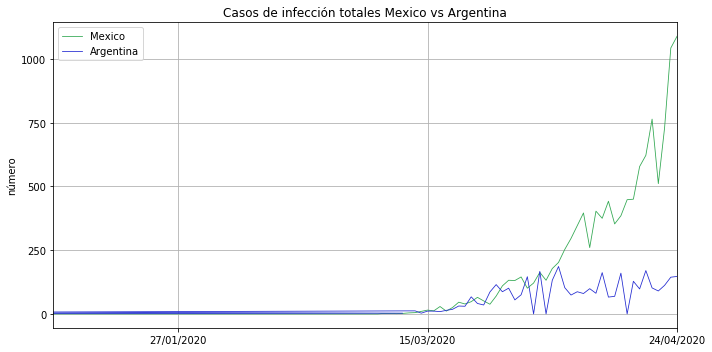

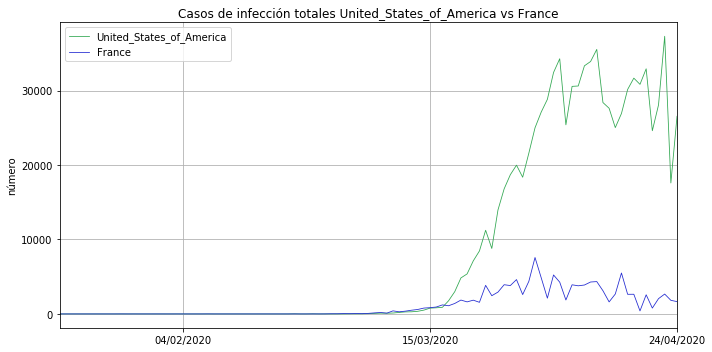

In [26]:
display(Markdown(f"""#### Casos de infección totales {PAIS_1} vs {PAIS_2}
#### y de {PAIS_3} vs {PAIS_4}"""))

# México contra Argentina
fig, ax = plt.subplots(figsize=(10, 5))

plot_ts(ax, datos_pais_1, 'cases', colores[0], lb =PAIS_1)
plot_ts(ax,datos_pais_2, 'cases', colores[2], lb =PAIS_2)

ax.set_xlim(100, 0)  # decreasing time
ax.set_ylabel('número')
ax.set_title(f'Casos de infección totales {PAIS_1} vs {PAIS_2}')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.grid(True)

plt.tight_layout()
plt.legend(loc='best')

# Estados Unidos contra Francia
fig, axp = plt.subplots(figsize=(10, 5))

plot_ts(axp, datos_pais_3, 'cases', colores[0], lb =PAIS_3)
plot_ts(axp,datos_pais_4, 'cases', colores[2], lb =PAIS_4)

axp.set_xlim(100, 0)  # decreasing time
axp.set_ylabel('número')
axp.set_title(f'Casos de infección totales {PAIS_3} vs {PAIS_4}')
axp.xaxis.set_major_locator(plt.MaxNLocator(3))
axp.yaxis.set_major_locator(plt.MaxNLocator(5))
axp.grid(True)

plt.tight_layout()
plt.legend(loc='best')

#### 3.3.1.3. Graficar el número total de muertes entre los países elegidos

#### Casos de muertes totales Mexico vs Argentina
#### y de United_States_of_America vs France

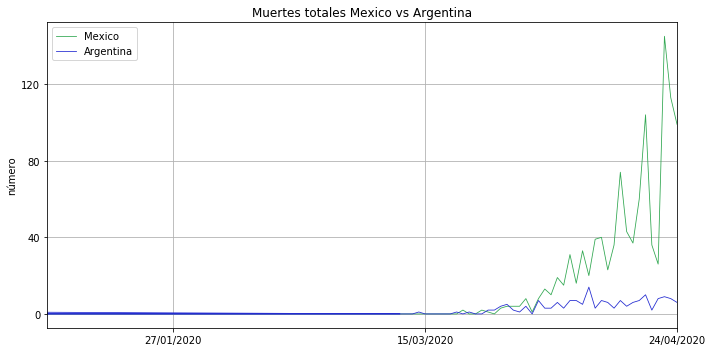

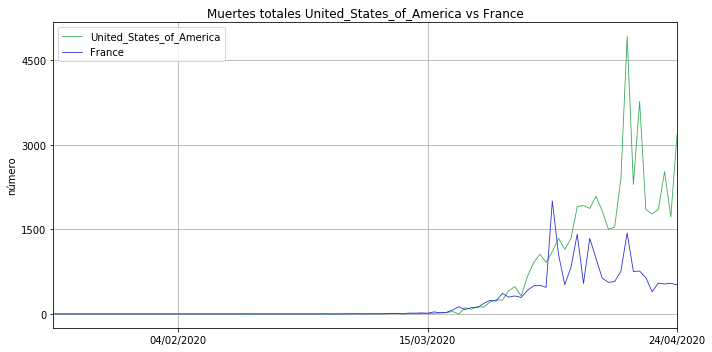

In [27]:
display(Markdown(f"""#### Casos de muertes totales {PAIS_1} vs {PAIS_2}
#### y de {PAIS_3} vs {PAIS_4}"""))

variable_dependiente = 'deaths'
# México contra Argentina
fig, ax = plt.subplots(figsize=(10, 5))

plot_ts(ax, datos_pais_1, variable_dependiente, colores[0], lb =PAIS_1)
plot_ts(ax,datos_pais_2, variable_dependiente, colores[2], lb =PAIS_2)

ax.set_xlim(100, 0)  # decreasing time
ax.set_ylabel('número')
ax.set_title(f'Muertes totales {PAIS_1} vs {PAIS_2}')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.grid(True)

plt.tight_layout()
plt.legend(loc='best')


# Estados Unidos contra Francia
fig, axp = plt.subplots(figsize=(10, 5))

plot_ts(axp, datos_pais_3, variable_dependiente, colores[0], lb =PAIS_3)
plot_ts(axp,datos_pais_4, variable_dependiente, colores[2], lb =PAIS_4)

axp.set_xlim(100, 0)  # decreasing time
axp.set_ylabel('número')
axp.set_title(f'Muertes totales {PAIS_3} vs {PAIS_4}')
axp.xaxis.set_major_locator(plt.MaxNLocator(3))
axp.yaxis.set_major_locator(plt.MaxNLocator(5))
axp.grid(True)

plt.tight_layout()
plt.legend(loc='best')

#### 3.3.1.4. Comparar trayectorias de infecciones y muertes hasta esta versión
La comparación se hace por medio de pruebas de estudiante (student t-tests). Aunque podríamos hacer análisis estadísticos más complejos, para esta exploración nos bastará hacer pruebas simples comparando a México con cada país.

In [28]:
from scipy.stats import ttest_ind

# México en comparación a Argentina
p1_p2_casos = ttest_ind(datos_pais_1['cases'], datos_pais_2['cases'])
p1_p2_muertes = ttest_ind(datos_pais_1['deaths'], datos_pais_2['deaths'])

# Estados Unidos en comparación a Francia
p3_p4_casos = ttest_ind(datos_pais_3['cases'], datos_pais_4['cases'])
p3_p4_muertes = ttest_ind(datos_pais_3['deaths'], datos_pais_4['deaths'])

# México en comparación a Estados Unidos
p1_p3_casos = ttest_ind(datos_pais_1['cases'], datos_pais_3['cases'])
p1_p3_muertes = ttest_ind(datos_pais_1['deaths'], datos_pais_3['deaths'])

# México en comparación a Francia
p1_p4_casos = ttest_ind(datos_pais_1['cases'], datos_pais_4['cases'])
p1_p4_muertes = ttest_ind(datos_pais_1['deaths'], datos_pais_4['deaths'])

display(Markdown(f'\n### México en comparación a Argentina'))
display(Markdown(f"""#### Casos
> statistic = {p1_p2_casos.statistic} significance = {p1_p2_casos.pvalue}"""))
display(Markdown(f"""#### Muertes
> statistic = {p1_p2_muertes.statistic} significance = {p1_p2_muertes.pvalue}"""))
display(Markdown(f'\n### Estados Unidos en comparación a Francia'))
display(Markdown(f"""#### Casos
> statistic = {p3_p4_casos.statistic} significance = {p3_p4_casos.pvalue}"""))
display(Markdown(f"""#### Muertes
> statistic = {p3_p4_muertes.statistic} significance = {p3_p4_muertes.pvalue}"""))
display(Markdown(f'\n### México en comparación a Estados Unidos'))
display(Markdown(f"""#### Casos
> statistic = {p1_p3_casos.statistic} significance = {p1_p3_casos.pvalue}"""))
display(Markdown(f"""#### Muertes
> statistic = {p1_p3_muertes.statistic} significance = {p1_p3_muertes.pvalue}"""))
display(Markdown(f'\n### México en comparación a Francia'))
display(Markdown(f"""#### Casos
> statistic = {p1_p4_casos.statistic} significance = {p1_p4_casos.pvalue}"""))
display(Markdown(f"""#### Muertes
> statistic = {p1_p4_muertes.statistic} significance = {p1_p4_muertes.pvalue}"""))


### México en comparación a Argentina

#### Casos
> statistic = 1.2029939153287224 significance = 0.23081297758796468

#### Muertes
> statistic = 1.8189718044326473 significance = 0.07084579915035077


### Estados Unidos en comparación a Francia

#### Casos
> statistic = 5.659947712209723 significance = 4.485514012566267e-08

#### Muertes
> statistic = 2.7195023186589253 significance = 0.007036957085578975


### México en comparación a Estados Unidos

#### Casos
> statistic = -6.305557093969299 significance = 1.531730675592142e-09

#### Muertes
> statistic = -4.919434071912506 significance = 1.6895964902956648e-06


### México en comparación a Francia

#### Casos
> statistic = -5.907228933627086 significance = 1.2954992093829039e-08

#### Muertes
> statistic = -5.10574876153312 significance = 7.079644785730324e-07

### *3.3.1. Porcentajes de infecciones y muertes de acuerdo con la población (2018) de cada país*
En este análisis usamos los datos de población que vienen listados en la tabla. Para investigar si los datos poblacionales son confiables, comparé el número de habitantes en México según la tabla (126,190,788) con la estimación del 2019 del Consejo Nacional de Población[https://www.gob.mx/conapo/documentos/la-situacion-demografica-de-mexico-2019]. El estimado oficial de la CONAPO para México es de 126,577,691 habitantes para el 2019. Debido a que la tabla usa datos del 2018, me parece que la estimación es buena y procederé al análisis.

In [29]:
#ToDo

## Lista de países y territorios en los datos de esta versión
El código a continuación extrae los países y territorios representados en esta versión de los datos.
Espero que esto te ayude a explorar más adelante sustituyendo el nombre de los países que yo seleccioné por el nombre de los países que tú quieras explorar:

In [30]:
from collections import defaultdict
def_dict = defaultdict(list)

lista_paises = datos_dia_elegido['countriesAndTerritories'].unique()

for pais in lista_paises:
    def_dict[pais[0]].append(pais)

for letra in def_dict.keys():
    display(Markdown(f""" #### {letra}:
    {def_dict[letra]}""")) 

 #### A:
    ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan']

 #### B:
    ['Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina', 'Botswana', 'Brazil', 'British_Virgin_Islands', 'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi']

 #### C:
    ['Cambodia', 'Cameroon', 'Canada', 'Cape_Verde', 'Cayman_Islands', 'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia']

 #### D:
    ['Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican_Republic']

 #### E:
    ['Ecuador', 'Egypt', 'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia']

 #### F:
    ['Falkland_Islands_(Malvinas)', 'Faroe_Islands', 'Fiji', 'Finland', 'France', 'French_Polynesia']

 #### G:
    ['Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea_Bissau', 'Guyana']

 #### H:
    ['Haiti', 'Holy_See', 'Honduras', 'Hungary']

 #### I:
    ['Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isle_of_Man', 'Israel', 'Italy']

 #### J:
    ['Jamaica', 'Japan', 'Jersey', 'Jordan']

 #### K:
    ['Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan']

 #### L:
    ['Laos', 'Latvia', 'Lebanon', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg']

 #### M:
    ['Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar']

 #### N:
    ['Namibia', 'Nepal', 'Netherlands', 'New_Caledonia', 'New_Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North_Macedonia', 'Northern_Mariana_Islands', 'Norway']

 #### O:
    ['Oman']

 #### P:
    ['Pakistan', 'Palestine', 'Panama', 'Papua_New_Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto_Rico']

 #### Q:
    ['Qatar']

 #### R:
    ['Romania', 'Russia', 'Rwanda']

 #### S:
    ['Saint_Kitts_and_Nevis', 'Saint_Lucia', 'Saint_Vincent_and_the_Grenadines', 'San_Marino', 'Sao_Tome_and_Principe', 'Saudi_Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra_Leone', 'Singapore', 'Sint_Maarten', 'Slovakia', 'Slovenia', 'Somalia', 'South_Africa', 'South_Korea', 'South_Sudan', 'Spain', 'Sri_Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria']

 #### T:
    ['Taiwan', 'Thailand', 'Timor_Leste', 'Togo', 'Trinidad_and_Tobago', 'Tunisia', 'Turkey', 'Turks_and_Caicos_islands']

 #### U:
    ['Uganda', 'Ukraine', 'United_Arab_Emirates', 'United_Kingdom', 'United_Republic_of_Tanzania', 'United_States_of_America', 'United_States_Virgin_Islands', 'Uruguay', 'Uzbekistan']

 #### V:
    ['Venezuela', 'Vietnam']

 #### Y:
    ['Yemen']

 #### Z:
    ['Zambia', 'Zimbabwe']

# Referencias y agradecimientos:

- Este recurso está inspirado en el artículo de Matt Makai, el cual recomiendo para quienes sepan programar en Python, pero no estén familiarizados con la librería Pandas.
> Makai, M. "Learning pandas by Exploring COVID-19 Data." Full Stack Python. 28 de marzo de 2020. En línea: https://www.fullstackpython.com/blog/learn-pandas-basic-commands-explore-covid-19-data.html 
- Puedes interactuar con este artículo gracias a:
> Jupyter et al., "Binder 2.0 - Reproducible, Interactive, Sharable Environments for Science at Scale." Proceedings of the 17th Python in Science Conference. 2018. doi://10.25080/Majora-4af1f417-011
- El fantástico artículo de Tomás pueyo lo pueden encontrar aquí:
> Pueyo, T. "Coronavirus: The Hammer and the Dance." Medium. 19 de marzo de 2020. En línea: https://medium.com/@tomaspueyo/coronavirus-the-hammer-and-the-dance-be9337092b56

    > Versión en español traducida por Tito Hubert: https://medium.com/tomas-pueyo/coronavirus-el-martillo-y-la-danza-32abc4dd4ebb